In [1]:
# Load dataset
import pandas as pd
columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
            'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
            'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 
            'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD']

df = pd.read_csv('Autism-Adult-Data.csv', names=columns)
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [2]:
df.shape

(704, 21)

In [3]:
for column in df.columns:
    print(f'{column} uniqe==> {df[column].unique()}\n')

A1_Score uniqe==> [1 0]

A2_Score uniqe==> [1 0]

A3_Score uniqe==> [1 0]

A4_Score uniqe==> [1 0]

A5_Score uniqe==> [0 1]

A6_Score uniqe==> [0 1]

A7_Score uniqe==> [1 0]

A8_Score uniqe==> [1 0]

A9_Score uniqe==> [0 1]

A10_Score uniqe==> [0 1]

age uniqe==> ['26' '24' '27' '35' '40' '36' '17' '64' '29' '33' '18' '31' '30' '34'
 '38' '42' '43' '48' '37' '55' '50' '53' '20' '28' '21' '383' '47' '32'
 '44' '?' '19' '58' '45' '22' '39' '25' '23' '54' '60' '41' '46' '56' '61'
 '59' '52' '49' '51']

gender uniqe==> ['f' 'm']

ethnicity uniqe==> ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian'
 "'Middle Eastern '" 'Pasifika' "'South Asian'" 'Hispanic' 'Turkish'
 'others']

jundice uniqe==> ['no' 'yes']

austim uniqe==> ['no' 'yes']

contry_of_res uniqe==> ["'United States'" 'Brazil' 'Spain' 'Egypt' "'New Zealand'" 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland'
 "'United Arab Emirates'" 'Afghanistan' 'Lebanon' "'United Kingdom'"
 "'South Africa'" 'Italy' 'Pakistan' 

In [4]:
# change ? with Others in relation column
df['relation'] = df['relation'].replace("?", "Others")
df['relation'].unique()

array(['Self', 'Parent', 'Others', "'Health care professional'",
       'Relative'], dtype=object)

In [5]:
# change ? with Others and others with Others in ethnicity column
df['ethnicity'] = df['ethnicity'].replace("?", "Others")
df['ethnicity'] = df['ethnicity'].replace("others", "Others")
df['ethnicity'].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       "'Middle Eastern '", 'Pasifika', "'South Asian'", 'Hispanic',
       'Turkish'], dtype=object)

In [6]:
# change ? with 0, dtype of age column and change 0, 383 with mean of column with is 29
df['age'] = df['age'].replace("?", '0')
df['age'] = df['age'].astype(int)
df['age'] = df['age'].replace(0, int(df['age'].mean()))
df['age'] = df['age'].replace(383, int(df['age'].mean()))
df['age'].unique()

array([26, 24, 27, 35, 40, 36, 17, 64, 29, 33, 18, 31, 30, 34, 38, 42, 43,
       48, 37, 55, 50, 53, 20, 28, 21, 47, 32, 44, 19, 58, 45, 22, 39, 25,
       23, 54, 60, 41, 46, 56, 61, 59, 52, 49, 51])

In [7]:
# Now there are 18 person under 18 so we delete it
df = df.loc[df["age"] > 17]
df.shape

(686, 21)

In [8]:
# Change Class/ASD 0 and 1
df['Class/ASD'] = df['Class/ASD'].apply(lambda x: 0 if x == 'NO' else 1)
df['Class/ASD'].unique()

array([0, 1], dtype=int64)

In [9]:
# Change col 0 and 1
col = ['used_app_before', 'jundice', 'austim']
for c in col:
    df[c] = df[c].apply(lambda x: 0 if x == 'no' else 1)

# change gender column
df['gender'] = df['gender'].apply(lambda x: 0 if x == 'f' else 1)

In [10]:
for column in df.columns:
    print(f'{column} uniqe==> {df[column].unique()}\n')

A1_Score uniqe==> [1 0]

A2_Score uniqe==> [1 0]

A3_Score uniqe==> [1 0]

A4_Score uniqe==> [1 0]

A5_Score uniqe==> [0 1]

A6_Score uniqe==> [0 1]

A7_Score uniqe==> [1 0]

A8_Score uniqe==> [1 0]

A9_Score uniqe==> [0 1]

A10_Score uniqe==> [0 1]

age uniqe==> [26 24 27 35 40 36 64 29 33 18 31 30 34 38 42 43 48 37 55 50 53 20 28 21
 47 32 44 19 58 45 22 39 25 23 54 60 41 46 56 61 59 52 49 51]

gender uniqe==> [0 1]

ethnicity uniqe==> ['White-European' 'Latino' 'Others' "'Middle Eastern '" 'Black' 'Pasifika'
 'Asian' "'South Asian'" 'Hispanic' 'Turkish']

jundice uniqe==> [0 1]

austim uniqe==> [0 1]

contry_of_res uniqe==> ["'United States'" 'Brazil' 'Spain' 'Egypt' "'New Zealand'" 'Burundi'
 'Jordan' 'Ireland' "'United Arab Emirates'" 'Afghanistan' 'Lebanon'
 "'United Kingdom'" "'South Africa'" 'Italy' 'Pakistan' 'Bangladesh'
 'Chile' 'France' 'China' 'Australia' 'Canada' "'Saudi Arabia'"
 'Netherlands' 'Sweden' 'Tonga' 'Oman' 'India' 'Philippines' "'Sri Lanka'"
 "'Sierra Leone'" 

In [11]:
df = df.drop('age_desc', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 703
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         686 non-null    int64 
 1   A2_Score         686 non-null    int64 
 2   A3_Score         686 non-null    int64 
 3   A4_Score         686 non-null    int64 
 4   A5_Score         686 non-null    int64 
 5   A6_Score         686 non-null    int64 
 6   A7_Score         686 non-null    int64 
 7   A8_Score         686 non-null    int64 
 8   A9_Score         686 non-null    int64 
 9   A10_Score        686 non-null    int64 
 10  age              686 non-null    int32 
 11  gender           686 non-null    int64 
 12  ethnicity        686 non-null    object
 13  jundice          686 non-null    int64 
 14  austim           686 non-null    int64 
 15  contry_of_res    686 non-null    object
 16  used_app_before  686 non-null    int64 
 17  result           686 non-null    in

In [12]:
# Encoder clolumns
cols = [cname for cname in df.columns if df[cname].dtype=='object']
cols

['ethnicity', 'contry_of_res', 'relation']

In [13]:
# encoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[cols] = oe.fit_transform(df[cols])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 703
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         686 non-null    int64  
 1   A2_Score         686 non-null    int64  
 2   A3_Score         686 non-null    int64  
 3   A4_Score         686 non-null    int64  
 4   A5_Score         686 non-null    int64  
 5   A6_Score         686 non-null    int64  
 6   A7_Score         686 non-null    int64  
 7   A8_Score         686 non-null    int64  
 8   A9_Score         686 non-null    int64  
 9   A10_Score        686 non-null    int64  
 10  age              686 non-null    int32  
 11  gender           686 non-null    int64  
 12  ethnicity        686 non-null    float64
 13  jundice          686 non-null    int64  
 14  austim           686 non-null    int64  
 15  contry_of_res    686 non-null    float64
 16  used_app_before  686 non-null    int64  
 17  result          

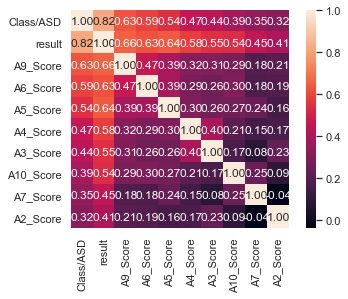

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

correlation = df.corr(method='pearson')
columns = correlation.nlargest(10, 'Class/ASD').index
columns
correlation_map = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, annot=True, square=True, fmt='.2f', 
                      yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [18]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))  
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=2021, max_iter=500)
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print("Accuracy: %.3f%%" % (result*100.0))
y_pred = model.predict(X_test)
regression_results(y_pred, y_test)

Accuracy: 100.000%
explained_variance:  1.0
mean_squared_log_error:  0.0
r2:  1.0
MAE:  0.0
MSE:  0.0
RMSE:  0.0


In [20]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, X, y, cv=3)
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score']

In [21]:
cv_results['test_score']

array([1., 1., 1.])

In [22]:
# See Bias and variance
from mlxtend.evaluate import bias_variance_decomp

mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.000
Bias: 0.000
Variance: 0.000
